# Data Exploration of Sentiment Datasets
This notebook explores all sentiment datasets in the project. Each dataset is analyzed in a separate section for clarity.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Airline Sentiment Dataset
Located at: `data/airline_sentiment/Tweets.csv`

In [35]:
airline_df = pd.read_csv("../data/airline_sentiment/Tweets.csv")
airline_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Dataset Overview

In [36]:
print(f"Dataset Shape: {airline_df.shape}")
print(f"\nColumn Information:")
print(airline_df.info())
print(f"\nMissing Values:")
print(airline_df.isnull().sum())
print(f"\nUnique Airlines: {airline_df['airline'].nunique()}")
print(f"Airlines: {list(airline_df['airline'].unique())}")

Dataset Shape: (14640, 15)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_create

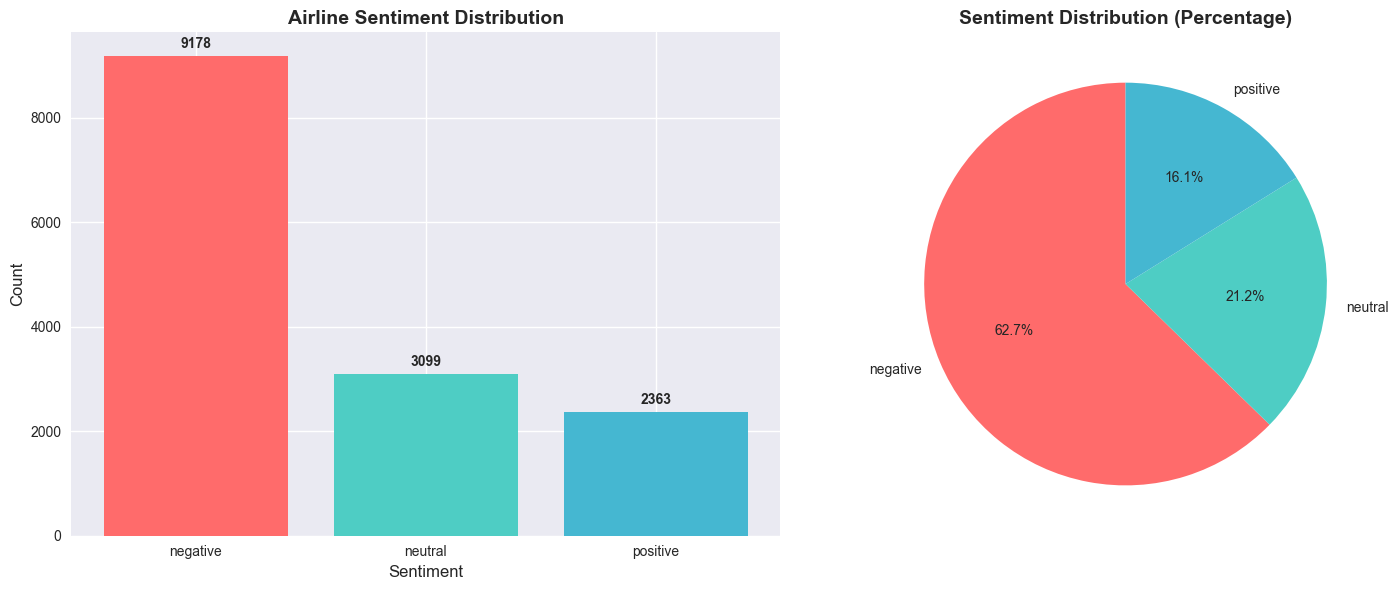

In [37]:
# Sentiment distribution (bar + pie)
sentiment_counts = airline_df['airline_sentiment'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.bar(sentiment_counts.index, sentiment_counts.values, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax1.set_title('Airline Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Sentiment', fontsize=12)
for i, v in enumerate(sentiment_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4', '#45b7d1'], startangle=90)
ax2.set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

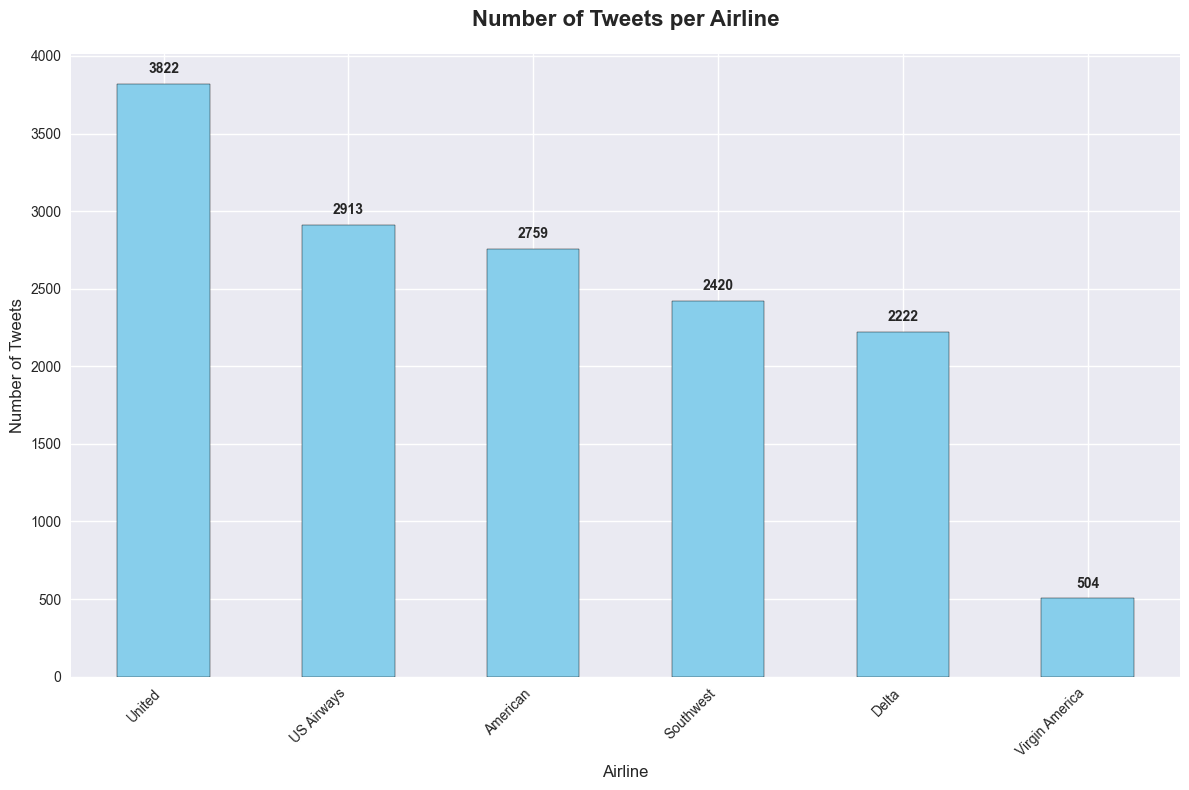

In [38]:
# Tweets per airline
airline_counts = airline_df['airline'].value_counts()
plt.figure(figsize=(12, 8))
ax = airline_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Tweets per Airline', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(airline_counts.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

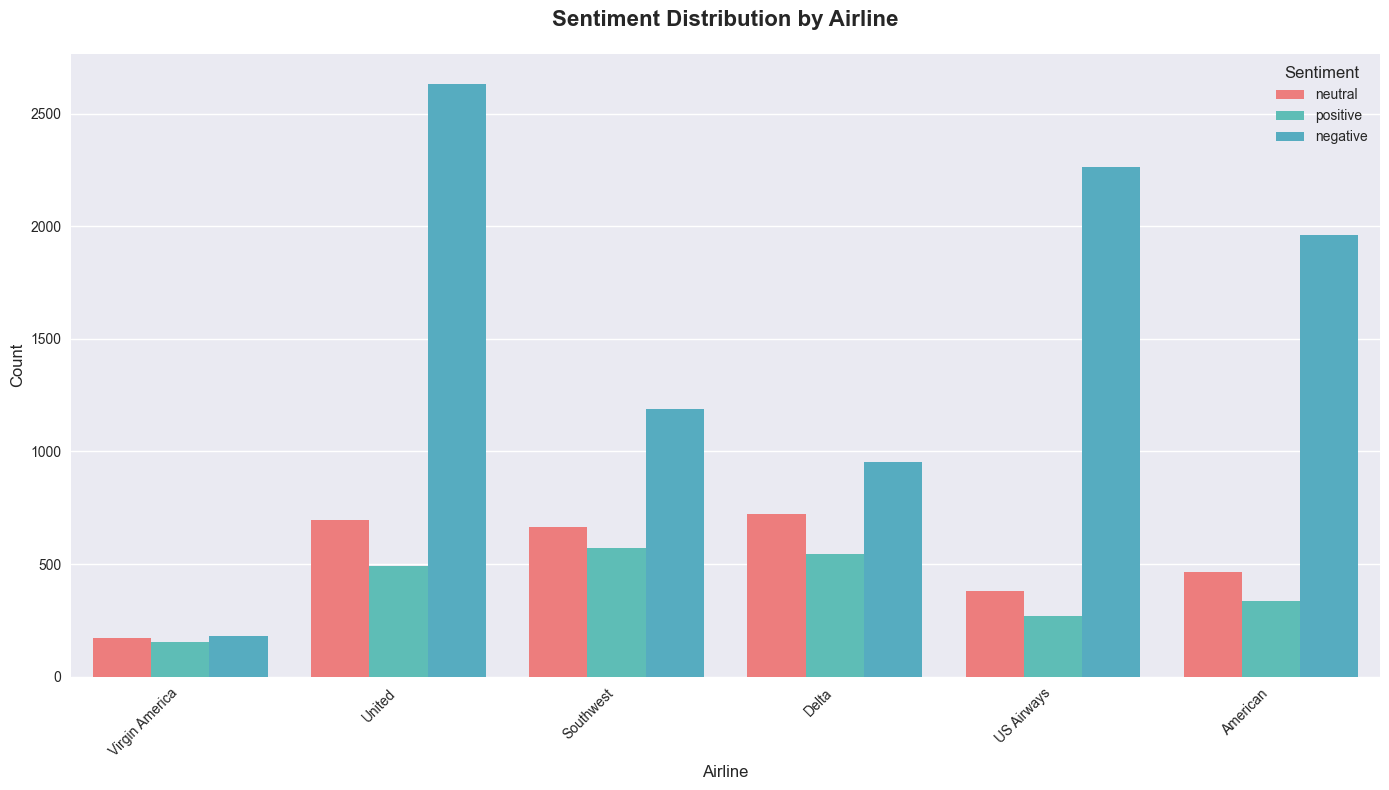

<Figure size 1400x800 with 0 Axes>

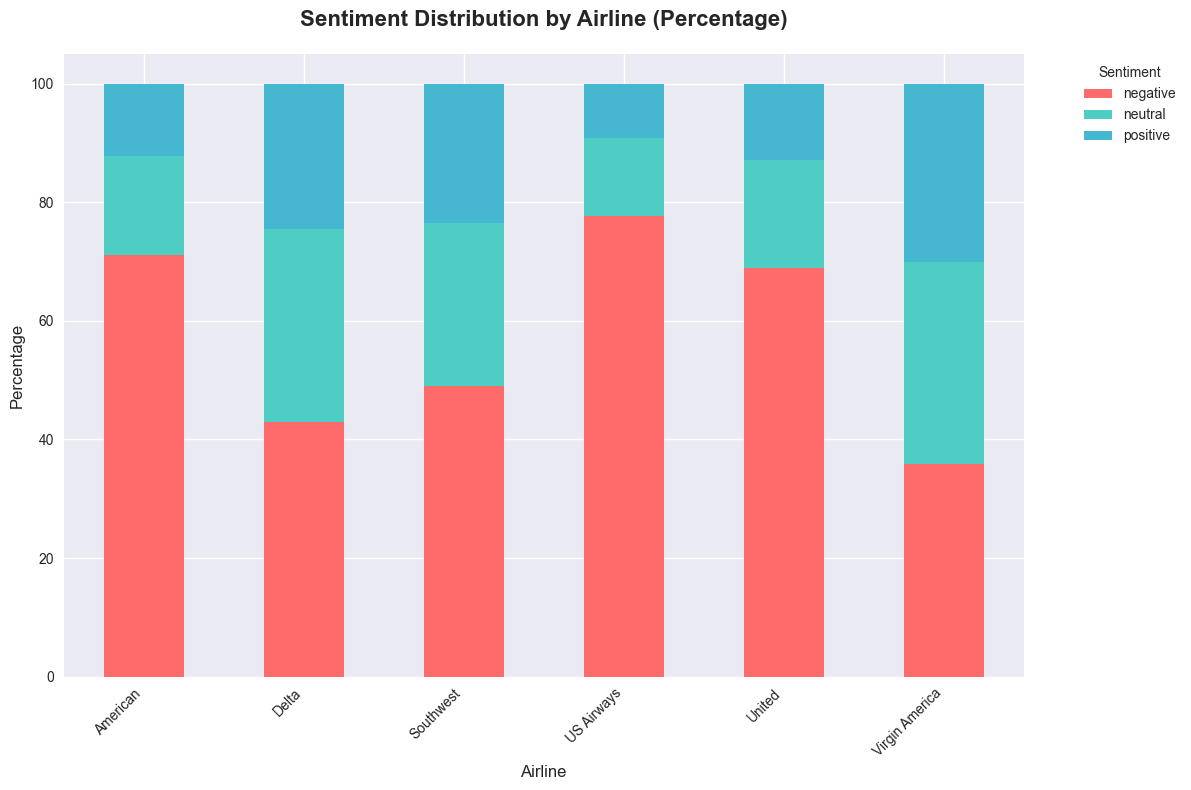

In [39]:
# Sentiment by airline (count and percent)
plt.figure(figsize=(14, 8))
sns.countplot(data=airline_df, x='airline', hue='airline_sentiment', 
              palette=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Sentiment Distribution by Airline', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

sentiment_pct = airline_df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_pct_norm = sentiment_pct.div(sentiment_pct.sum(axis=1), axis=0) * 100
plt.figure(figsize=(14, 8))
sentiment_pct_norm.plot(kind='bar', stacked=True, 
                       color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Sentiment Distribution by Airline (Percentage)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Confidence Analysis and Temporal Patterns

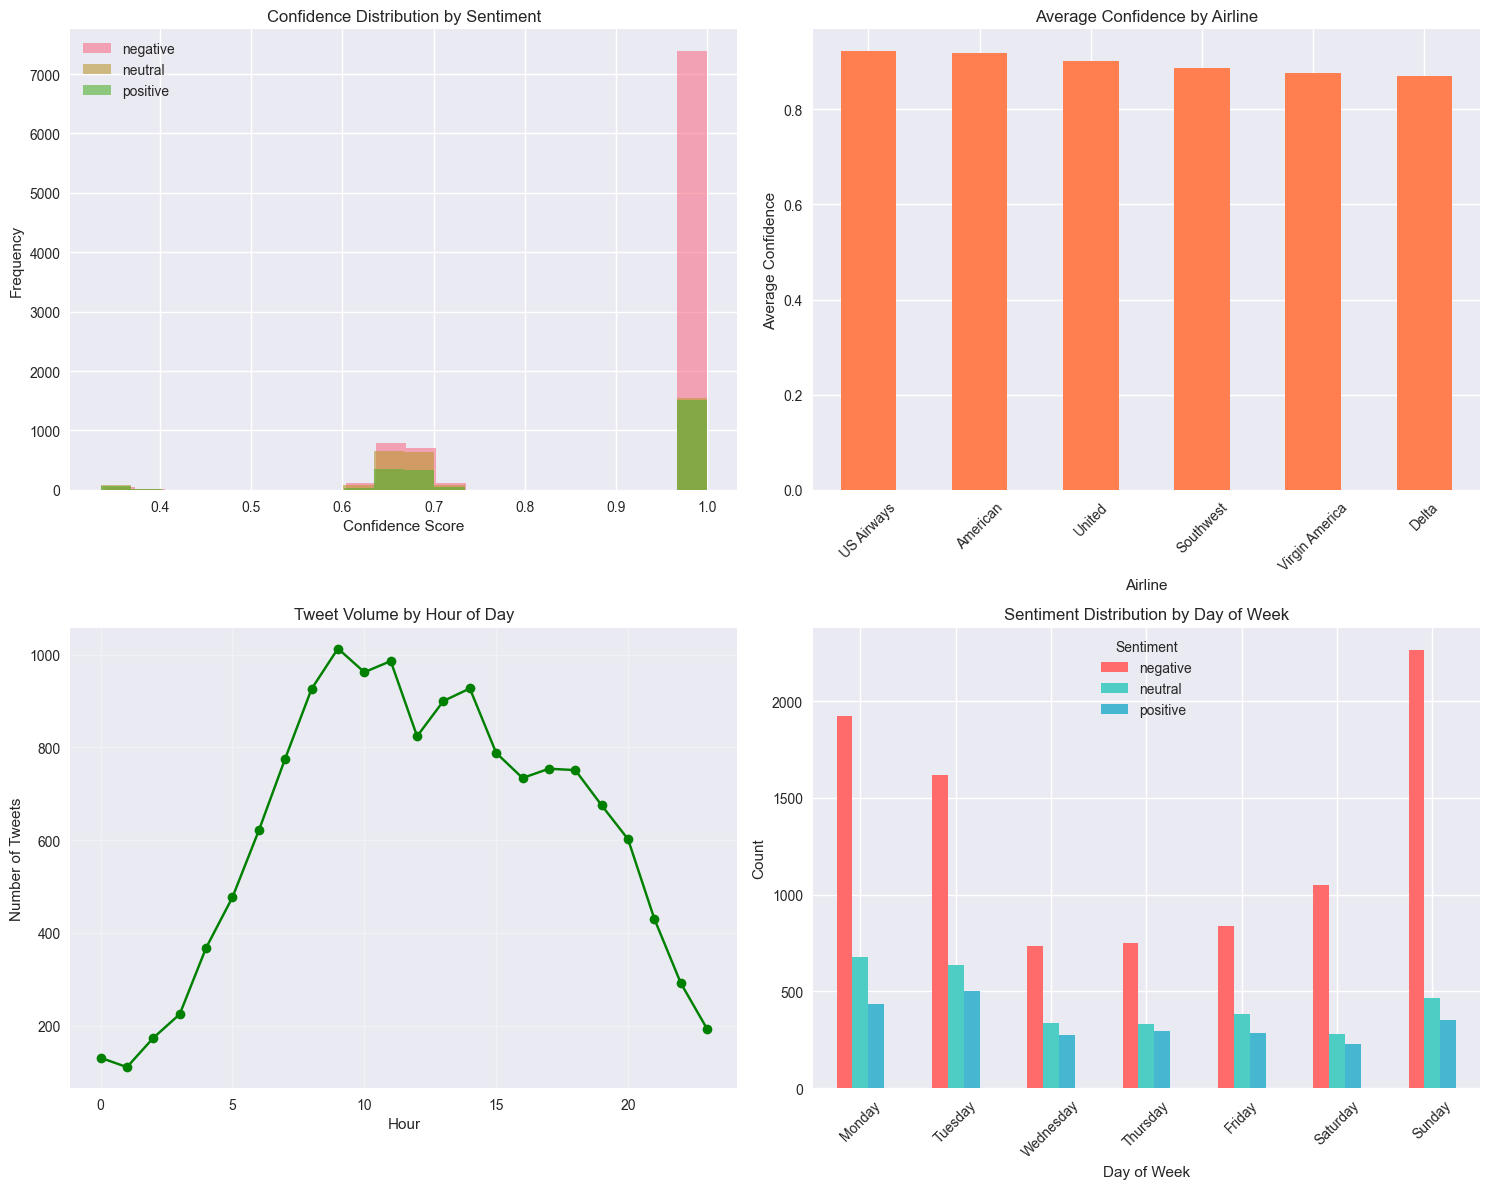

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
    if sentiment in airline_df['airline_sentiment'].values:
        data = airline_df[airline_df['airline_sentiment'] == sentiment]['airline_sentiment_confidence']
        axes[0, 0].hist(data, alpha=0.6, label=sentiment, bins=20)
axes[0, 0].set_title('Confidence Distribution by Sentiment')
axes[0, 0].set_xlabel('Confidence Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
conf_by_airline = airline_df.groupby('airline')['airline_sentiment_confidence'].mean().sort_values(ascending=False)
conf_by_airline.plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Average Confidence by Airline')
axes[0, 1].set_xlabel('Airline')
axes[0, 1].set_ylabel('Average Confidence')
axes[0, 1].tick_params(axis='x', rotation=45)
airline_df['tweet_created'] = pd.to_datetime(airline_df['tweet_created'])
airline_df['hour'] = airline_df['tweet_created'].dt.hour
airline_df['day_of_week'] = airline_df['tweet_created'].dt.day_name()
hourly_tweets = airline_df['hour'].value_counts().sort_index()
hourly_tweets.plot(kind='line', ax=axes[1, 0], marker='o', color='green')
axes[1, 0].set_title('Tweet Volume by Hour of Day')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Number of Tweets')
axes[1, 0].grid(True, alpha=0.3)
day_sentiment = airline_df.groupby(['day_of_week', 'airline_sentiment']).size().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sentiment = day_sentiment.reindex(day_order)
day_sentiment.plot(kind='bar', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
axes[1, 1].set_title('Sentiment Distribution by Day of Week')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Sentiment')
plt.tight_layout()
plt.show()

## 2. Apple Twitter Sentiment Dataset
Located at: `data/apple_sentiment/apple-twitter-sentiment-texts.csv`

In [41]:
apple_df = pd.read_csv("../data/apple_sentiment/apple-twitter-sentiment-texts.csv")
apple_df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


### Dataset Overview

In [42]:
print(f"Dataset Shape: {apple_df.shape}")
print(f"\nColumn Information:")
print(apple_df.info())
print(f"\nMissing Values:")
print(apple_df.isnull().sum())
print(f"\nSentiment Value Mapping: -1=Negative, 0=Neutral, 1=Positive")
print(f"Sentiment Distribution:")
print(apple_df['sentiment'].value_counts().sort_index())

Dataset Shape: (1630, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB
None

Missing Values:
text         0
sentiment    0
dtype: int64

Sentiment Value Mapping: -1=Negative, 0=Neutral, 1=Positive
Sentiment Distribution:
sentiment
-1    686
 0    801
 1    143
Name: count, dtype: int64


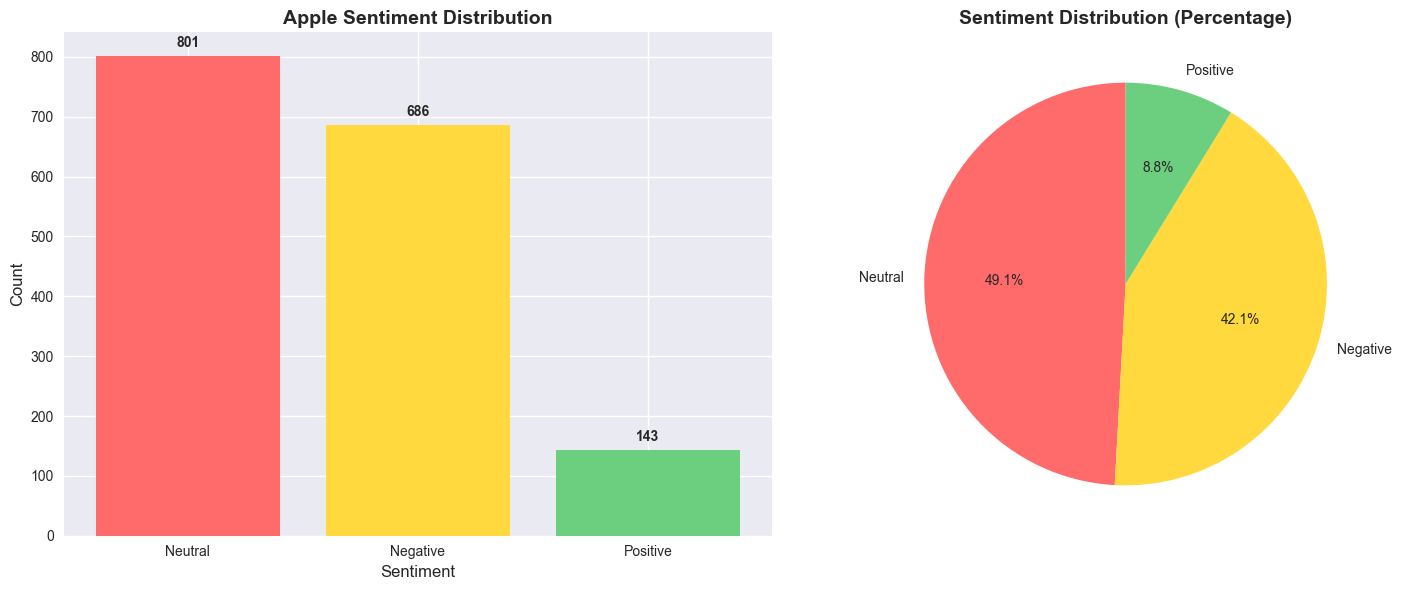

In [43]:
sentiment_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
apple_df['sentiment_label'] = apple_df['sentiment'].map(sentiment_mapping)
sentiment_counts = apple_df['sentiment_label'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']
ax1.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
ax1.set_title('Apple Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Sentiment', fontsize=12)
for i, v in enumerate(sentiment_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Text Analysis and Word Clouds

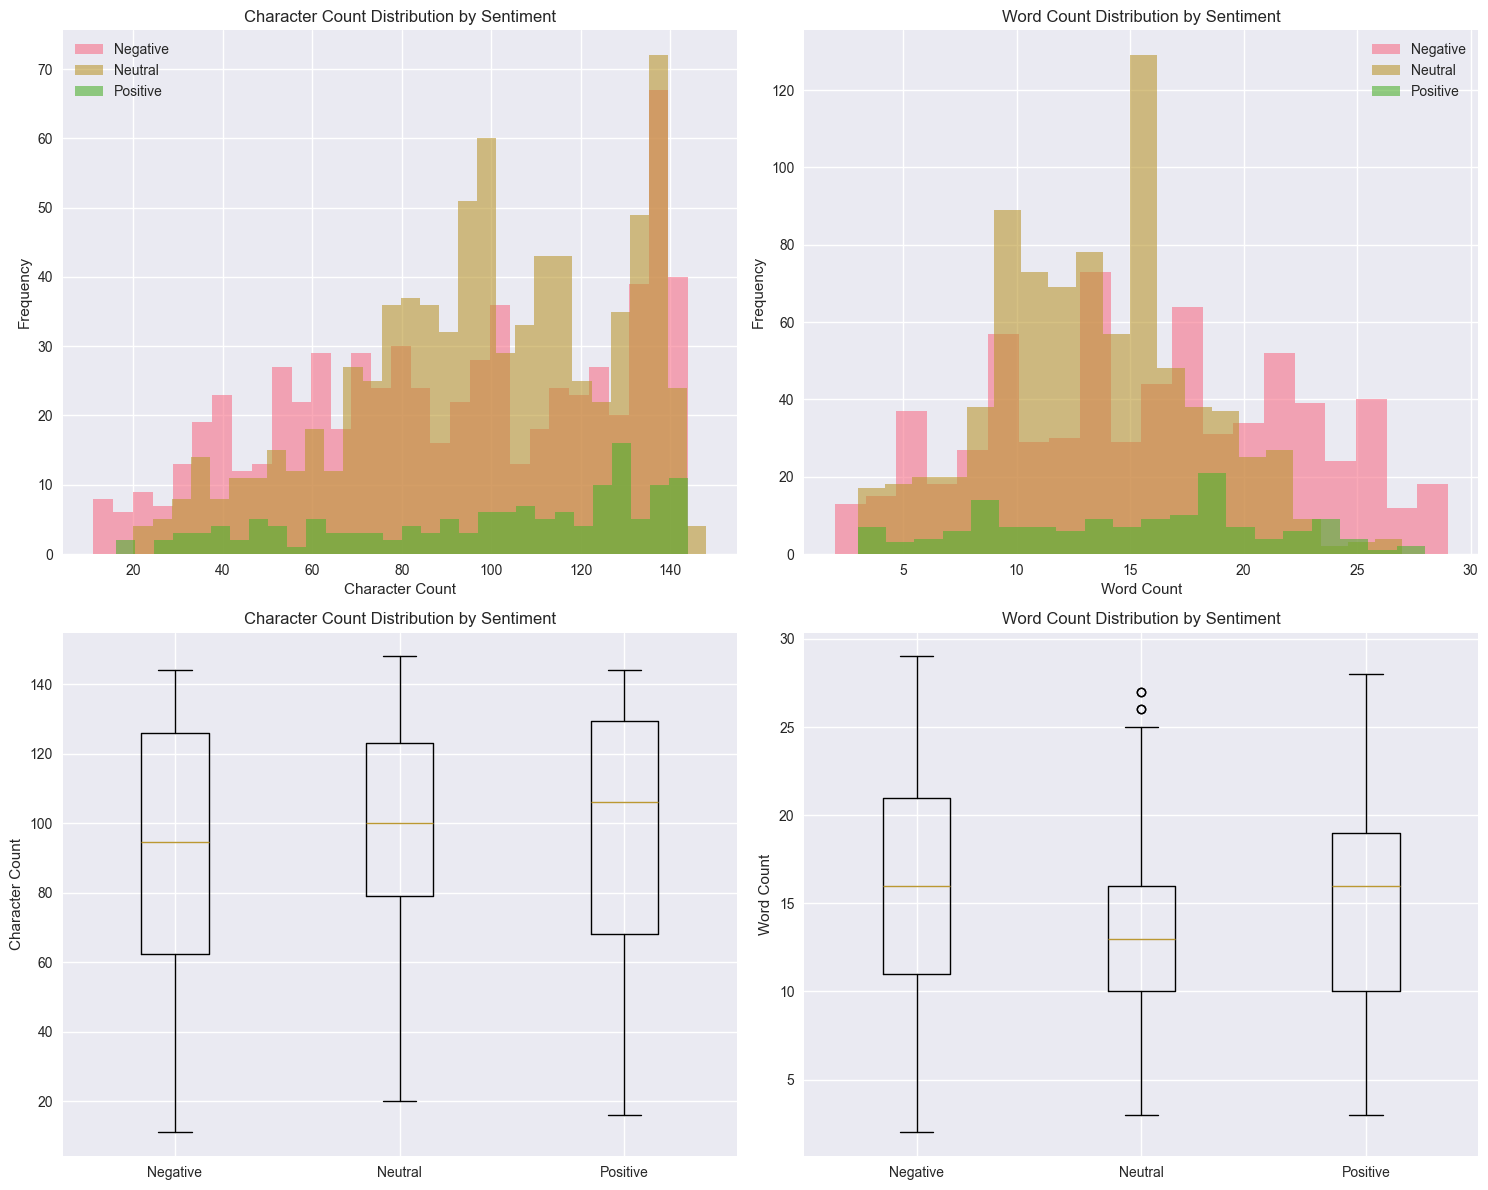

Text Statistics by Sentiment:
                char_count                                                   \
                     count       mean        std   min    25%    50%    75%   
sentiment_label                                                               
Negative             686.0  91.062682  36.373173  11.0  62.25   94.5  126.0   
Neutral              801.0  98.446941  29.688718  20.0  79.00  100.0  123.0   
Positive             143.0  98.475524  35.520245  16.0  68.00  106.0  129.5   

                       word_count                                              \
                   max      count       mean       std  min   25%   50%   75%   
sentiment_label                                                                 
Negative         144.0      686.0  15.787172  6.569886  2.0  11.0  16.0  21.0   
Neutral          148.0      801.0  13.377029  4.471317  3.0  10.0  13.0  16.0   
Positive         144.0      143.0  14.846154  6.073850  3.0  10.0  16.0  19.0   

        

In [44]:
apple_df['word_count'] = apple_df['text'].astype(str).apply(lambda x: len(x.split()))
apple_df['char_count'] = apple_df['text'].astype(str).apply(len)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for sentiment in apple_df['sentiment_label'].unique():
    data = apple_df[apple_df['sentiment_label'] == sentiment]['char_count']
    axes[0, 0].hist(data, alpha=0.6, label=sentiment, bins=30)
axes[0, 0].set_title('Character Count Distribution by Sentiment')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
for sentiment in apple_df['sentiment_label'].unique():
    data = apple_df[apple_df['sentiment_label'] == sentiment]['word_count']
    axes[0, 1].hist(data, alpha=0.6, label=sentiment, bins=20)
axes[0, 1].set_title('Word Count Distribution by Sentiment')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
sentiment_data = [apple_df[apple_df['sentiment_label'] == s]['char_count'].values 
                 for s in ['Negative', 'Neutral', 'Positive']]
axes[1, 0].boxplot(sentiment_data, labels=['Negative', 'Neutral', 'Positive'])
axes[1, 0].set_title('Character Count Distribution by Sentiment')
axes[1, 0].set_ylabel('Character Count')
word_data = [apple_df[apple_df['sentiment_label'] == s]['word_count'].values 
            for s in ['Negative', 'Neutral', 'Positive']]
axes[1, 1].boxplot(word_data, labels=['Negative', 'Neutral', 'Positive'])
axes[1, 1].set_title('Word Count Distribution by Sentiment')
axes[1, 1].set_ylabel('Word Count')
plt.tight_layout()
plt.show()
print("Text Statistics by Sentiment:")
print(apple_df.groupby('sentiment_label')[['char_count', 'word_count']].describe())

## 3. Reddit Sentiment Dataset
Located at: `data/social_media_sentiment/Reddit_Data.csv`

In [45]:
reddit_df = pd.read_csv("../data/social_media_sentiment/Reddit_Data.csv")
reddit_df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### Dataset Overview

In [46]:
print(f"Dataset Shape: {reddit_df.shape}")
print(f"\nColumn Information:")
print(reddit_df.info())
print(f"\nMissing Values:")
print(reddit_df.isnull().sum())
print(f"\nCategory Distribution:")
print(reddit_df['category'].value_counts())
print(f"\nCategory Mapping: -1=Negative, 0=Neutral, 1=Positive")

Dataset Shape: (37249, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
None

Missing Values:
clean_comment    100
category           0
dtype: int64

Category Distribution:
category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

Category Mapping: -1=Negative, 0=Neutral, 1=Positive


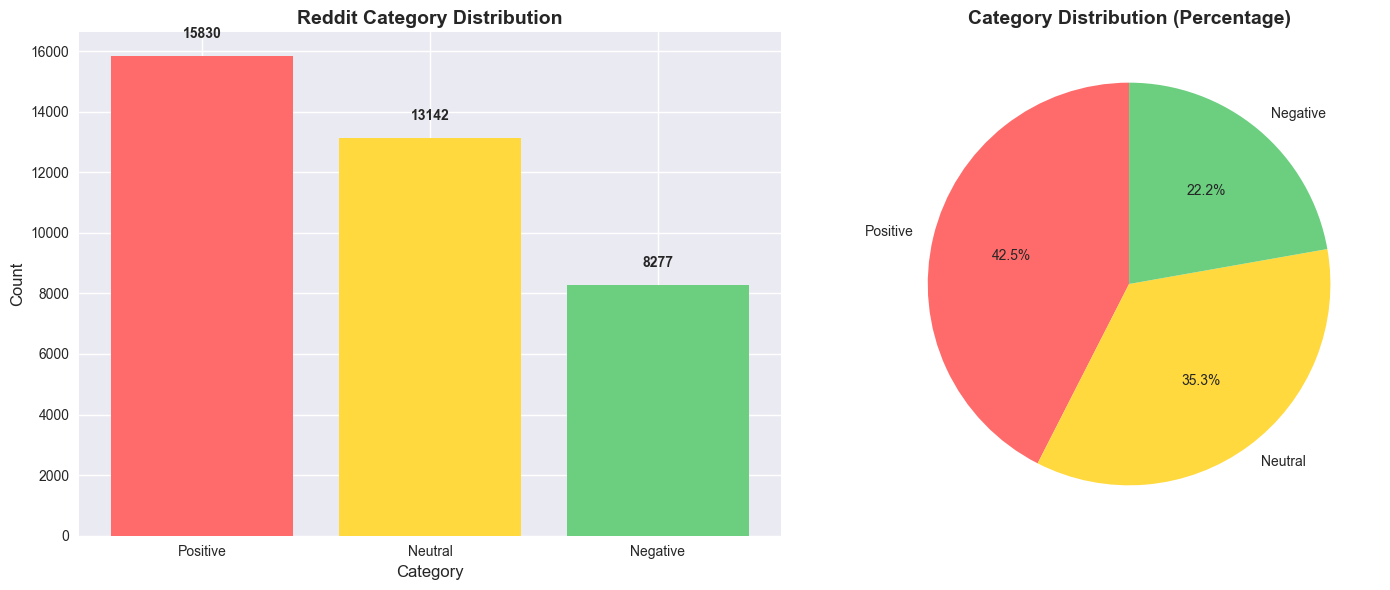

In [47]:
category_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
reddit_df['category_label'] = reddit_df['category'].map(category_mapping)
category_counts = reddit_df['category_label'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']
ax1.bar(category_counts.index, category_counts.values, color=colors)
ax1.set_title('Reddit Category Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
for i, v in enumerate(category_counts.values):
    ax1.text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')
ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Category Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

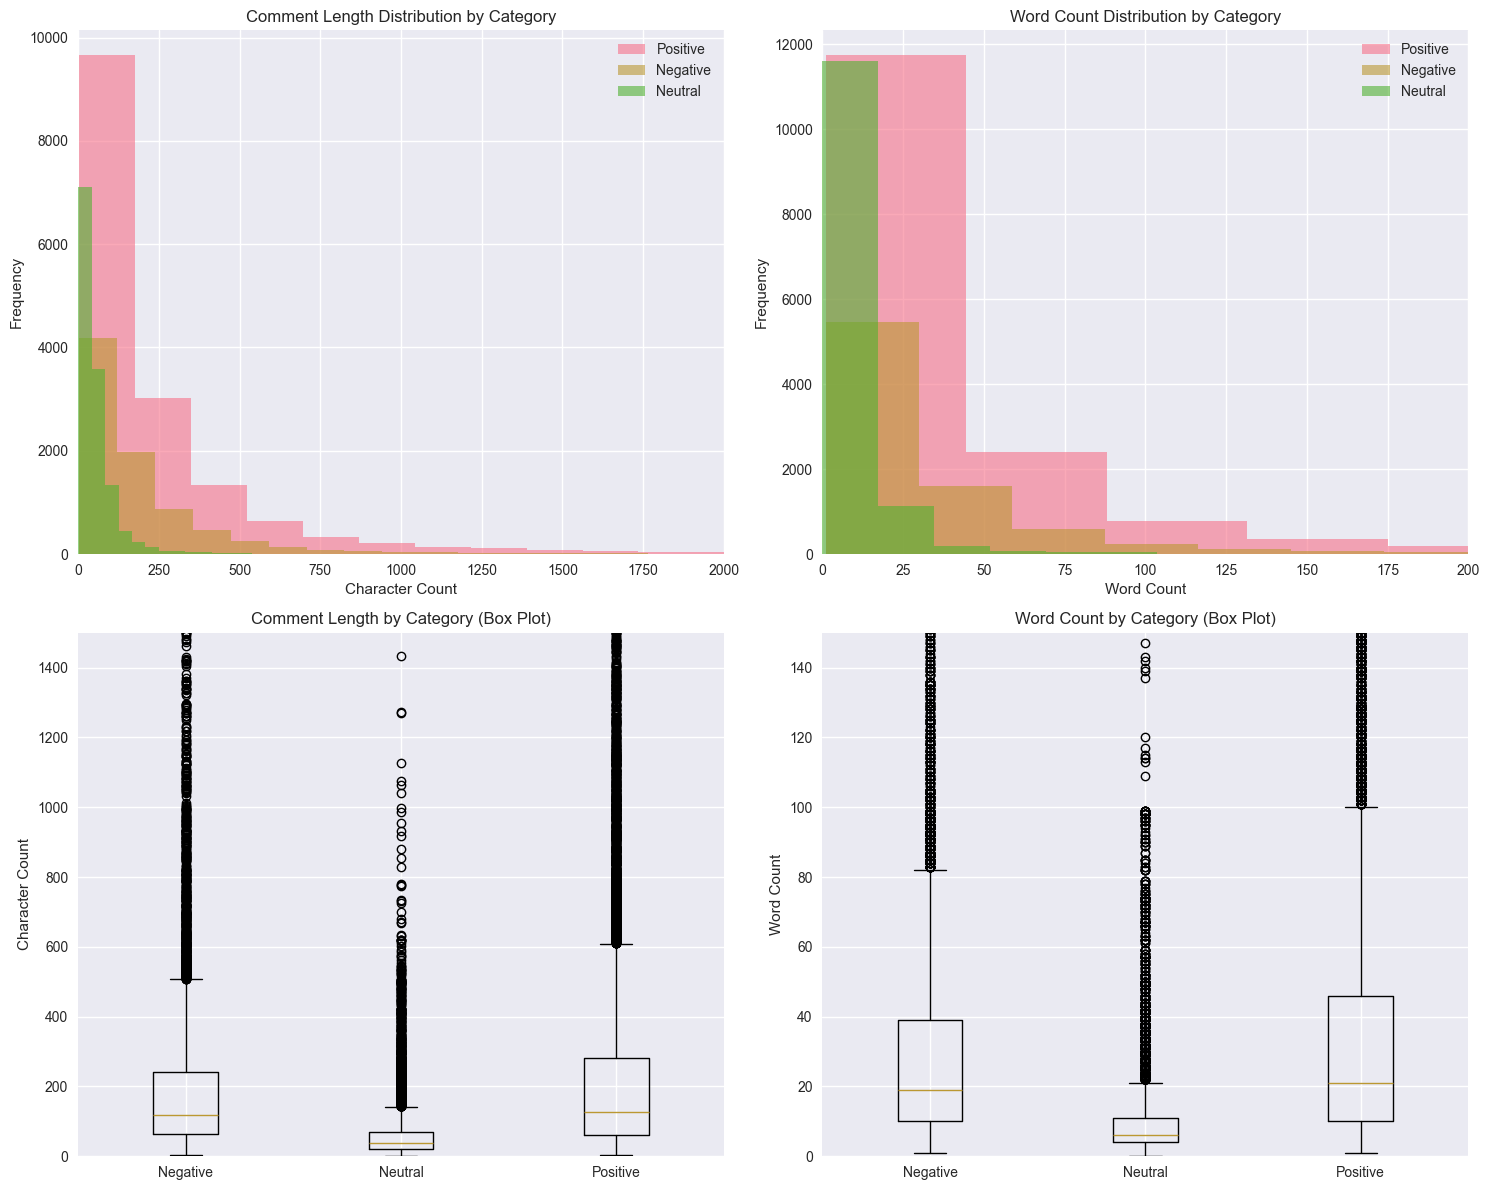

Comment Statistics by Category:
               comment_length                                            \
                        count        mean         std  min   25%    50%   
category_label                                                            
Negative               8277.0  214.804398  334.737606  3.0  63.0  119.0   
Neutral               13142.0   59.134607   79.395007  1.0  22.0   39.0   
Positive              15830.0  264.284649  466.972841  3.0  62.0  127.0   

                              word_count                                   \
                  75%     max      count       mean        std  min   25%   
category_label                                                              
Negative        241.0  5875.0     8277.0  34.793403  52.457003  1.0  10.0   
Neutral          70.0  2074.0    13142.0   9.683610  13.170452  0.0   4.0   
Positive        281.0  8665.0    15830.0  42.778016  73.621996  1.0  10.0   

                                    
                 

In [48]:
reddit_df['word_count'] = reddit_df['clean_comment'].astype(str).apply(lambda x: len(x.split()))
reddit_df['comment_length'] = reddit_df['clean_comment'].astype(str).apply(len)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for category in reddit_df['category_label'].unique():
    data = reddit_df[reddit_df['category_label'] == category]['comment_length']
    axes[0, 0].hist(data, alpha=0.6, label=category, bins=50)
axes[0, 0].set_title('Comment Length Distribution by Category')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 2000)
for category in reddit_df['category_label'].unique():
    data = reddit_df[reddit_df['category_label'] == category]['word_count']
    axes[0, 1].hist(data, alpha=0.6, label=category, bins=30)
axes[0, 1].set_title('Word Count Distribution by Category')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 200)
comment_data = [reddit_df[reddit_df['category_label'] == c]['comment_length'].values 
               for c in ['Negative', 'Neutral', 'Positive']]
axes[1, 0].boxplot(comment_data, labels=['Negative', 'Neutral', 'Positive'])
axes[1, 0].set_title('Comment Length by Category (Box Plot)')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].set_ylim(0, 1500)
word_data = [reddit_df[reddit_df['category_label'] == c]['word_count'].values 
            for c in ['Negative', 'Neutral', 'Positive']]
axes[1, 1].boxplot(word_data, labels=['Negative', 'Neutral', 'Positive'])
axes[1, 1].set_title('Word Count by Category (Box Plot)')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_ylim(0, 150)
plt.tight_layout()
plt.show()
print("Comment Statistics by Category:")
print(reddit_df.groupby('category_label')[['comment_length', 'word_count']].describe())

## 4. Twitter Sentiment Dataset (Social Media)
Located at: `data/social_media_sentiment/Twitter_Data.csv`

In [49]:
twitter_social_df = pd.read_csv("../data/social_media_sentiment/Twitter_Data.csv")
twitter_social_df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


### Dataset Overview

In [50]:
print(f"Dataset Shape: {twitter_social_df.shape}")
print(f"\nColumn Information:")
print(twitter_social_df.info())
print(f"\nMissing Values:")
print(twitter_social_df.isnull().sum())
print(f"\nCategory Distribution:")
print(twitter_social_df['category'].value_counts())
print(f"\nCategory Mapping: -1=Negative, 0=Neutral, 1=Positive")

Dataset Shape: (162980, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Missing Values:
clean_text    4
category      7
dtype: int64

Category Distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

Category Mapping: -1=Negative, 0=Neutral, 1=Positive


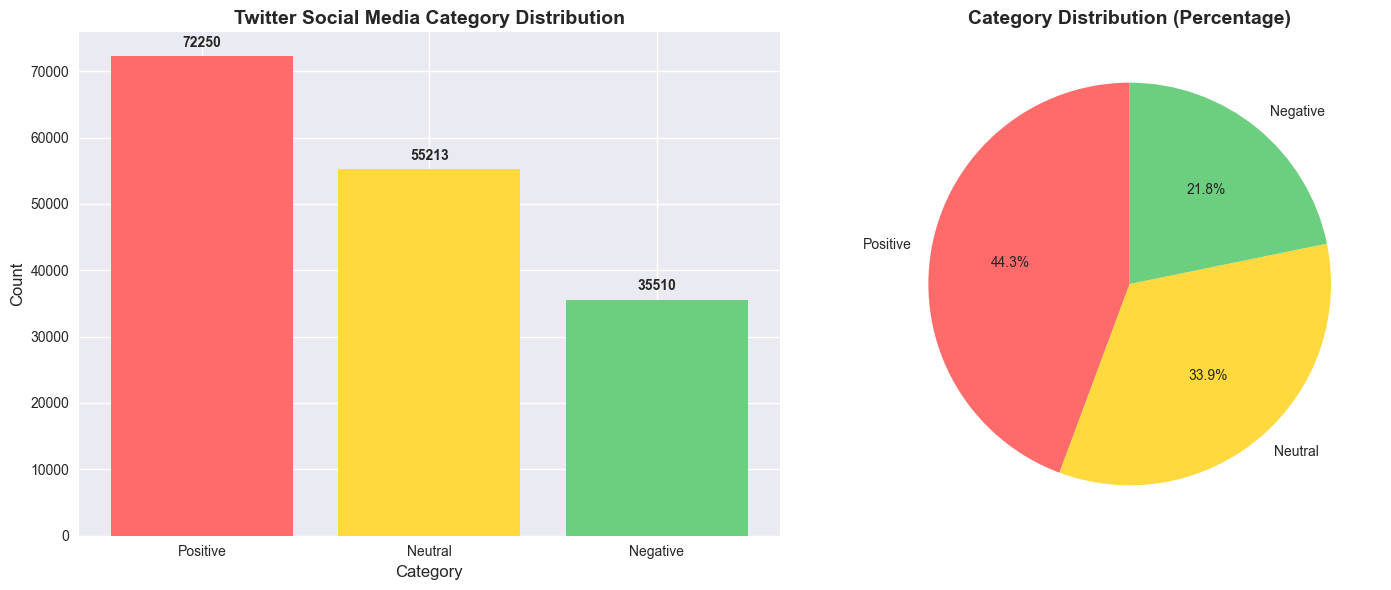

In [51]:
category_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
twitter_social_df['category_label'] = twitter_social_df['category'].map(category_mapping)
category_counts = twitter_social_df['category_label'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#ff6b6b', '#ffd93d', '#6bcf7f']
ax1.bar(category_counts.index, category_counts.values, color=colors)
ax1.set_title('Twitter Social Media Category Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
for i, v in enumerate(category_counts.values):
    ax1.text(i, v + 1000, str(v), ha='center', va='bottom', fontweight='bold')
ax2.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Category Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

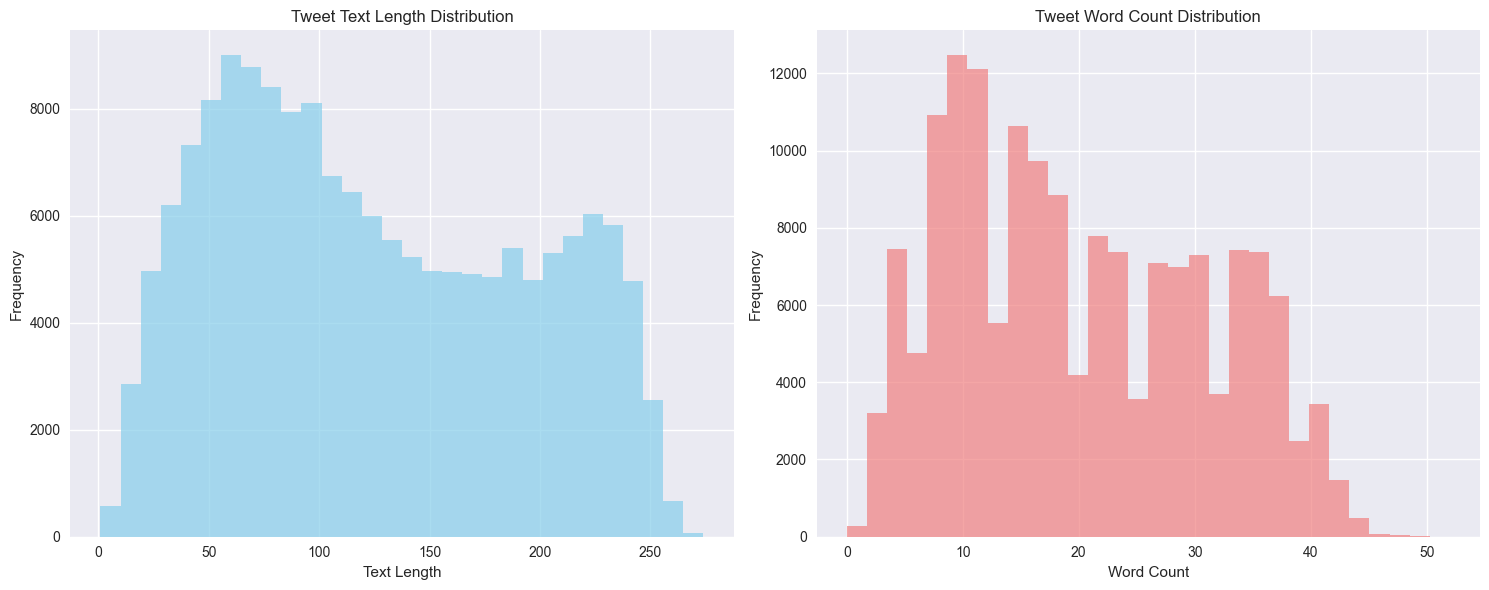

In [52]:
twitter_social_df['text_length'] = twitter_social_df['clean_text'].astype(str).apply(len)
twitter_social_df['word_count'] = twitter_social_df['clean_text'].astype(str).apply(lambda x: len(x.split()))
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].hist(twitter_social_df['text_length'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Tweet Text Length Distribution')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')
axes[1].hist(twitter_social_df['word_count'], bins=30, color='lightcoral', alpha=0.7)
axes[1].set_title('Tweet Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## 5. Twitter Sentiment Dataset (Combined)
Located at: `data/twitter_sentiment/twitter_training.csv` and `twitter_validation.csv`

In [54]:
# twitter_train_df = pd.read_csv("../data/twitter_sentiment/twitter_training.csv", header=None)
# twitter_val_df = pd.read_csv("../data/twitter_sentiment/twitter_validation.csv", header=None)
# twitter_combined_df = pd.concat([twitter_train_df, twitter_val_df], ignore_index=True)
# twitter_combined_df.columns = ['id', 'platform', 'sentiment', 'comment']
# twitter_combined_df.head()

In [56]:
twitter_combined_df = pd.read_csv("../data/twitter_sentiment/twitter_combined.csv")
twitter_combined_df.head()

,id,platform,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Dataset Overview

In [57]:
print(f"Combined Dataset Shape: {twitter_combined_df.shape}")
print(f"Training set: {len(twitter_train_df)}, Validation set: {len(twitter_val_df)}")
print(f"\nPlatform Distribution:")
print(twitter_combined_df['platform'].value_counts())
print(f"\nSentiment Distribution:")
print(twitter_combined_df['sentiment'].value_counts())

Combined Dataset Shape: (75682, 4)
Training set: 74682, Validation set: 1000

Platform Distribution:
platform
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
CallOfDutyBlackopsColdWar            2403
Facebook                             2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO   

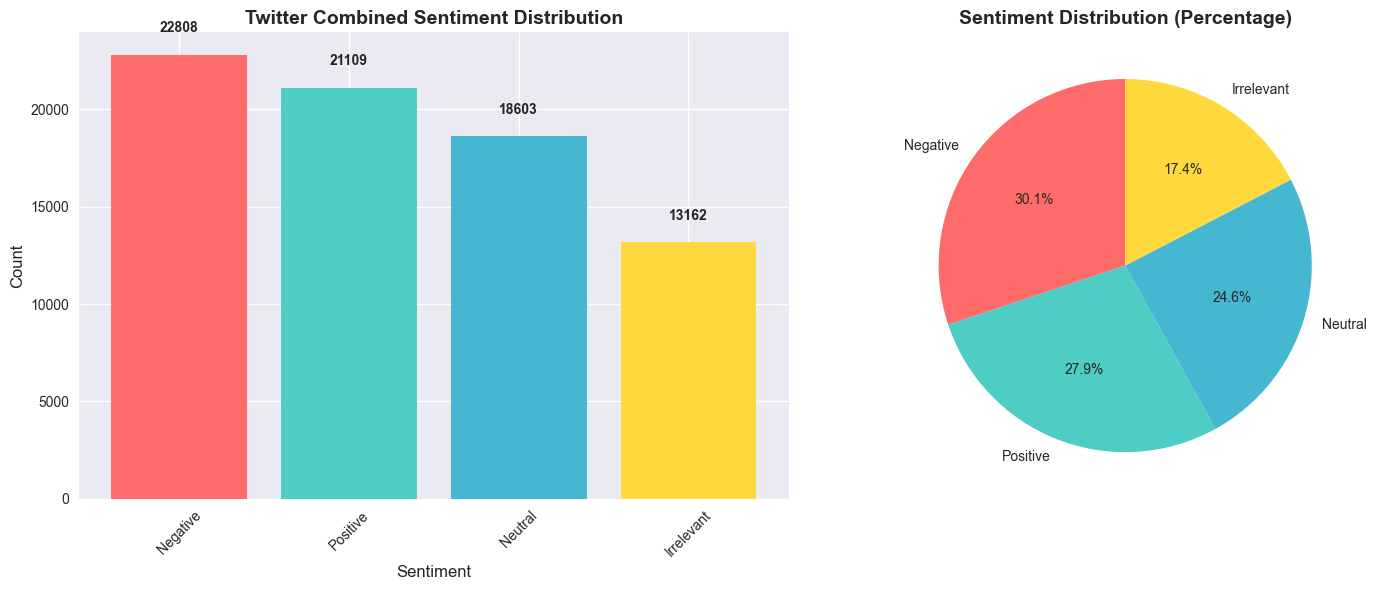

In [58]:
sentiment_counts = twitter_combined_df['sentiment'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#ffd93d']
ax1.bar(sentiment_counts.index, sentiment_counts.values, color=colors[:len(sentiment_counts)])
ax1.set_title('Twitter Combined Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(sentiment_counts.values):
    ax1.text(i, v + 1000, str(v), ha='center', va='bottom', fontweight='bold')
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors[:len(sentiment_counts)], startangle=90)
ax2.set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

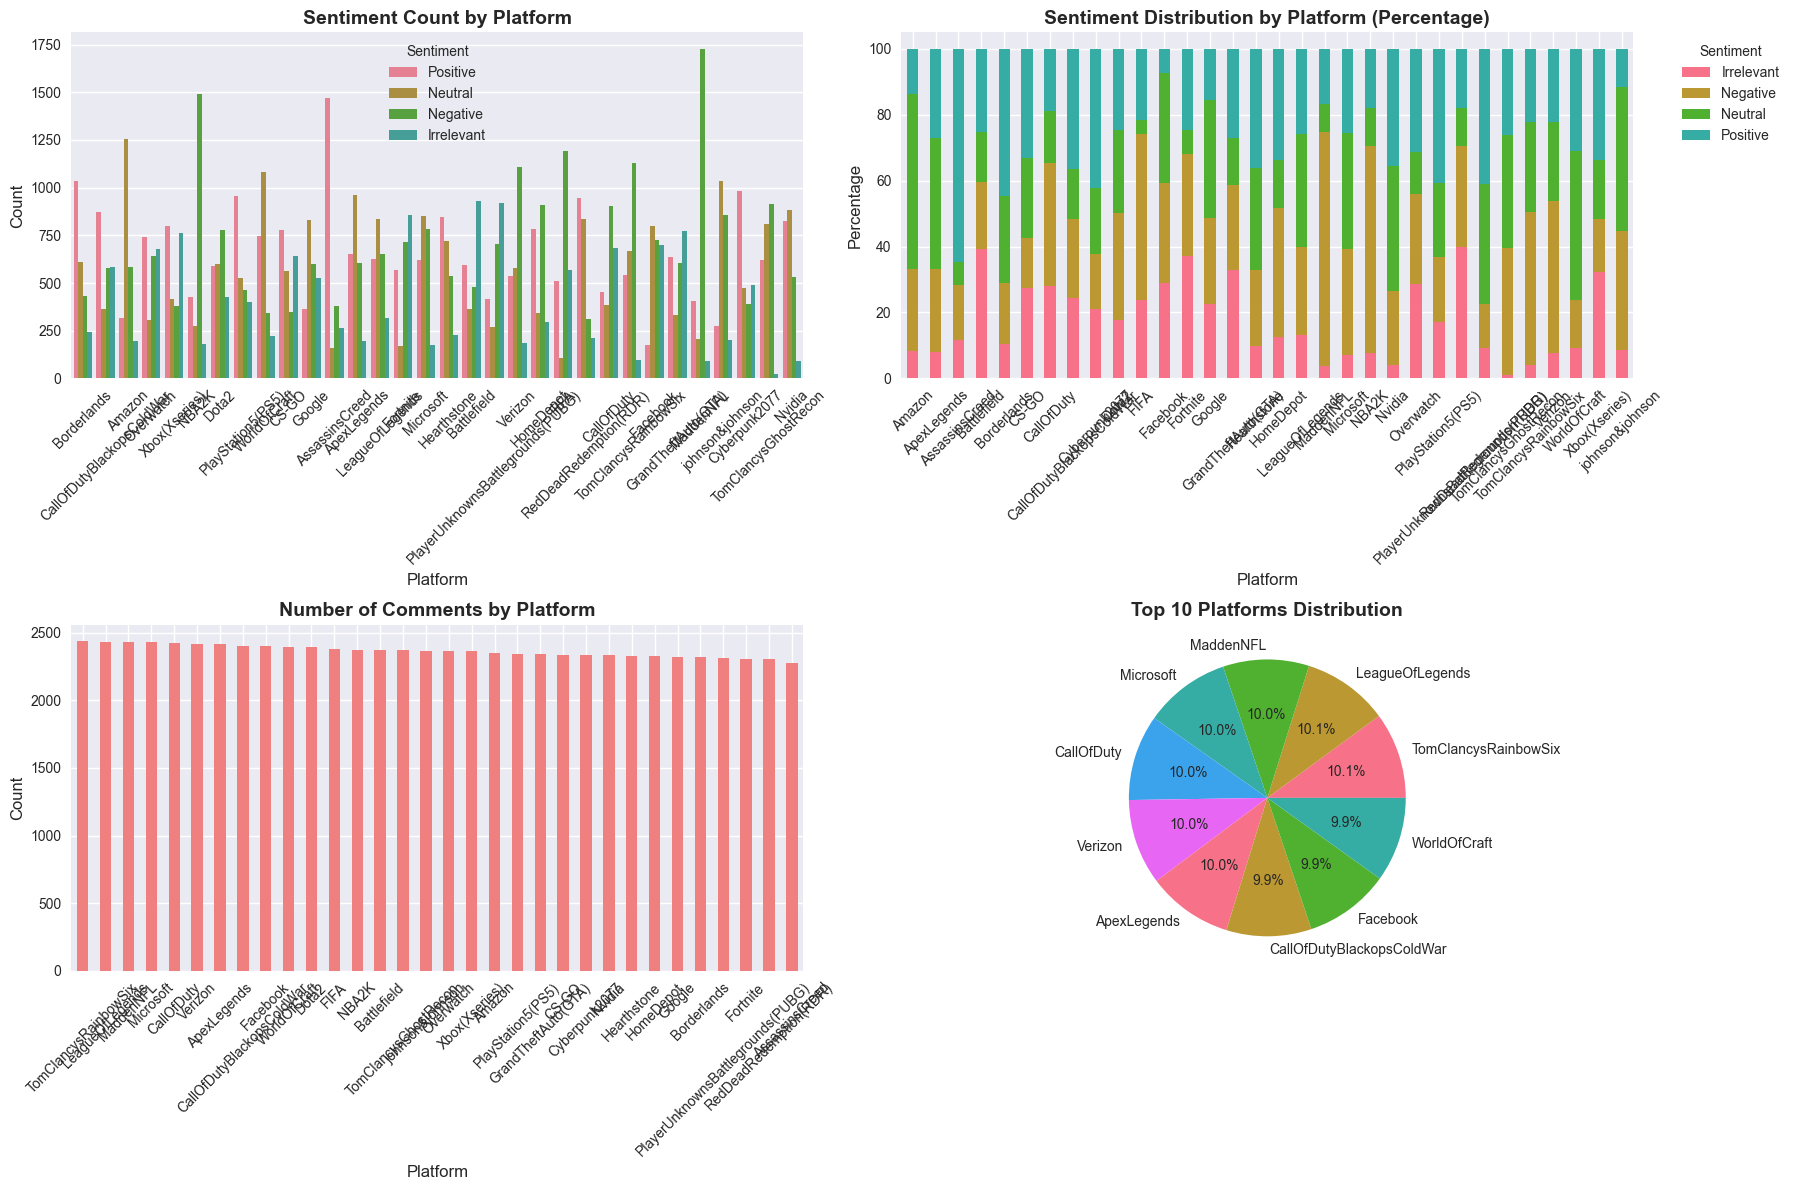


Total unique platforms: 32
Top 10 platforms by volume:
platform
TomClancysRainbowSix         2435
LeagueOfLegends              2431
MaddenNFL                    2429
Microsoft                    2428
CallOfDuty                   2425
Verizon                      2414
ApexLegends                  2412
CallOfDutyBlackopsColdWar    2403
Facebook                     2403
WorldOfCraft                 2394
Name: count, dtype: int64


In [59]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.countplot(data=twitter_combined_df, x='platform', hue='sentiment', ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Count by Platform', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Platform', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Sentiment')
sentiment_pct = twitter_combined_df.groupby(['platform', 'sentiment']).size().unstack(fill_value=0)
sentiment_pct_norm = sentiment_pct.div(sentiment_pct.sum(axis=1), axis=0) * 100
sentiment_pct_norm.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Distribution by Platform (Percentage)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Platform', fontsize=12)
axes[0, 1].set_ylabel('Percentage', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
platform_counts = twitter_combined_df['platform'].value_counts()
platform_counts.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Number of Comments by Platform', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Platform', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
top_platforms = platform_counts.head(10)
axes[1, 1].pie(top_platforms.values, labels=top_platforms.index, autopct='%1.1f%%')
axes[1, 1].set_title('Top 10 Platforms Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print(f"\nTotal unique platforms: {twitter_combined_df['platform'].nunique()}")
print(f"Top 10 platforms by volume:")
print(platform_counts.head(10))

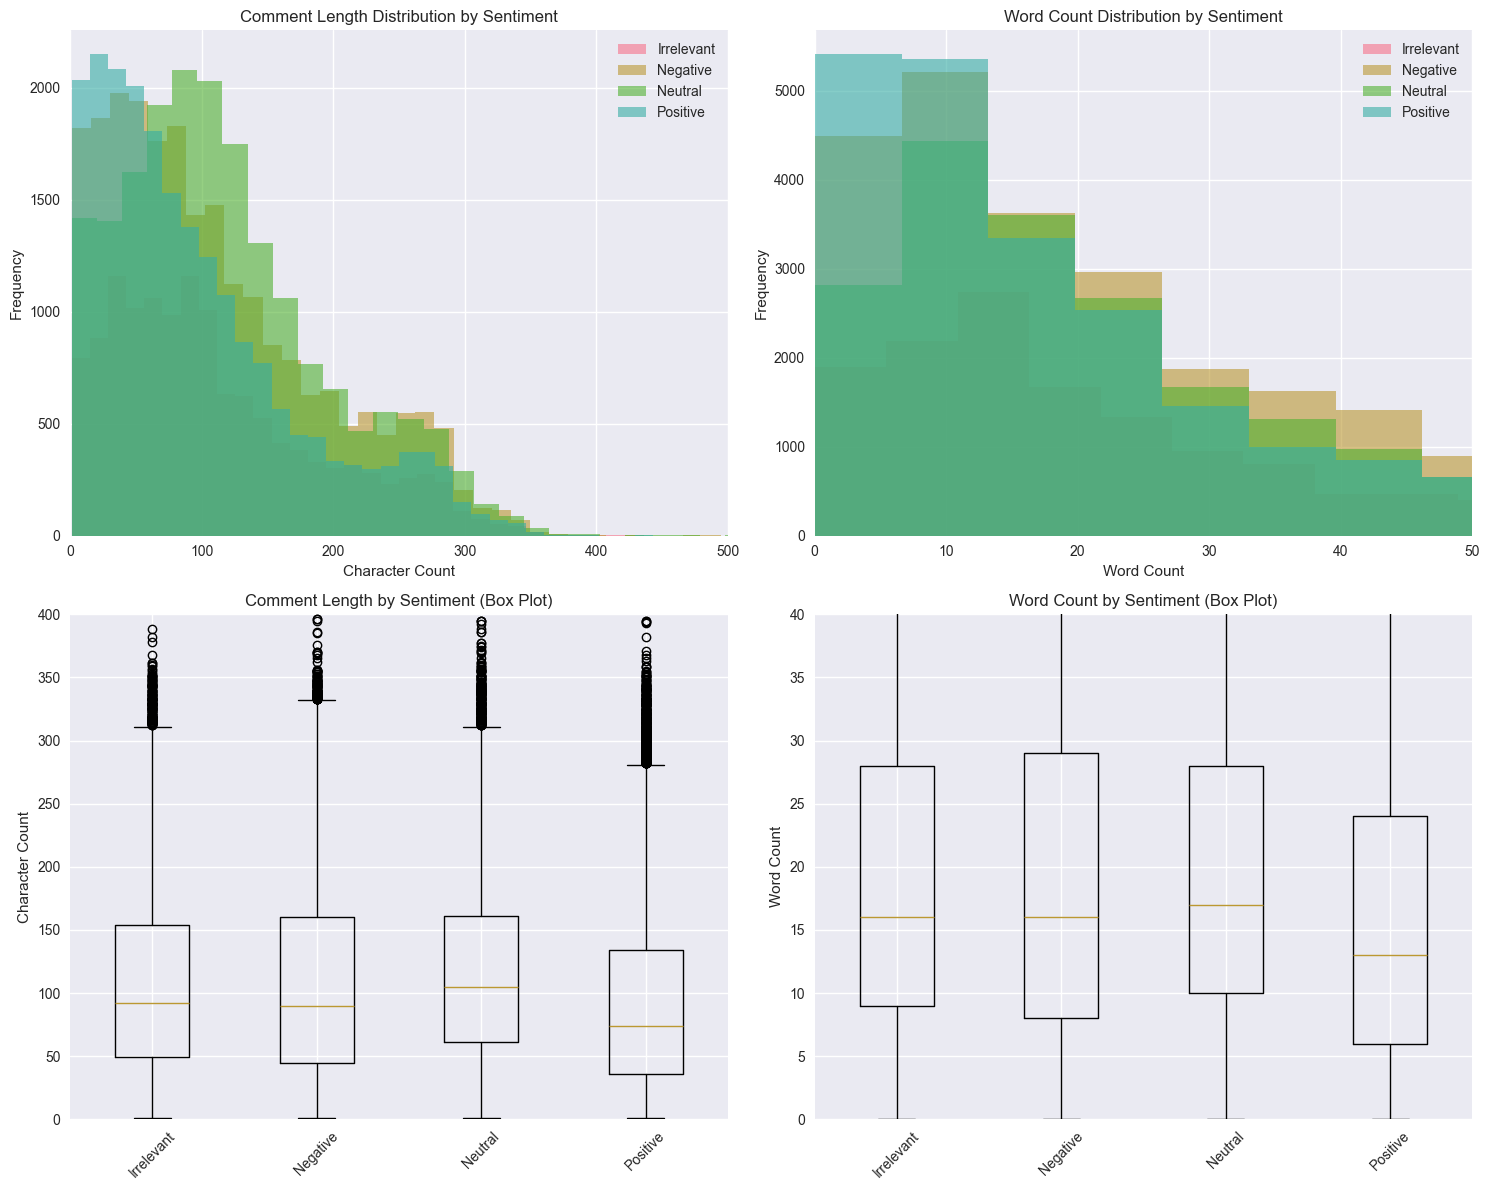

Comment Statistics by Sentiment:
           comment_length                                                  \
                    count        mean        std  min   25%    50%    75%   
sentiment                                                                   
Irrelevant        13162.0  110.330345  79.544836  1.0  49.0   92.0  154.0   
Negative          22808.0  110.546343  82.077110  1.0  45.0   90.0  160.0   
Neutral           18603.0  118.012202  78.075623  1.0  61.0  105.0  161.0   
Positive          21109.0   95.436638  77.599789  1.0  36.0   74.0  134.0   

                  word_count                                               \
              max      count       mean        std  min   25%   50%   75%   
sentiment                                                                   
Irrelevant  692.0    13162.0  19.501520  14.287363  0.0   9.0  16.0  28.0   
Negative    727.0    22808.0  19.905954  14.958995  0.0   8.0  16.0  29.0   
Neutral     957.0    18603.0  20.058915  1

In [60]:
twitter_combined_df['word_count'] = twitter_combined_df['comment'].astype(str).apply(lambda x: len(x.split()))
twitter_combined_df['comment_length'] = twitter_combined_df['comment'].astype(str).apply(len)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sentiment_order = sorted(twitter_combined_df['sentiment'].unique())
for sentiment in sentiment_order:
    data = twitter_combined_df[twitter_combined_df['sentiment'] == sentiment]['comment_length']
    axes[0, 0].hist(data, alpha=0.6, label=sentiment, bins=50)
axes[0, 0].set_title('Comment Length Distribution by Sentiment')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 500)
for sentiment in sentiment_order:
    data = twitter_combined_df[twitter_combined_df['sentiment'] == sentiment]['word_count']
    axes[0, 1].hist(data, alpha=0.6, label=sentiment, bins=30)
axes[0, 1].set_title('Word Count Distribution by Sentiment')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 50)
comment_data = [twitter_combined_df[twitter_combined_df['sentiment'] == s]['comment_length'].values 
               for s in sentiment_order]
axes[1, 0].boxplot(comment_data, labels=sentiment_order)
axes[1, 0].set_title('Comment Length by Sentiment (Box Plot)')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].set_ylim(0, 400)
axes[1, 0].tick_params(axis='x', rotation=45)
word_data = [twitter_combined_df[twitter_combined_df['sentiment'] == s]['word_count'].values 
            for s in sentiment_order]
axes[1, 1].boxplot(word_data, labels=sentiment_order)
axes[1, 1].set_title('Word Count by Sentiment (Box Plot)')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_ylim(0, 40)
axes[1, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
print("Comment Statistics by Sentiment:")
print(twitter_combined_df.groupby('sentiment')[['comment_length', 'word_count']].describe())

## Cross-Dataset Comparison and Summary

Dataset Comparison Summary:
          Dataset   Rows  Columns  Unique_Sentiments
Airline Sentiment  14640       17                  3
    Apple Twitter   1630        5                  3
      Reddit Data  37249        5                  3
   Twitter Social 162980        5                  3
 Twitter Combined  75682        6                  4


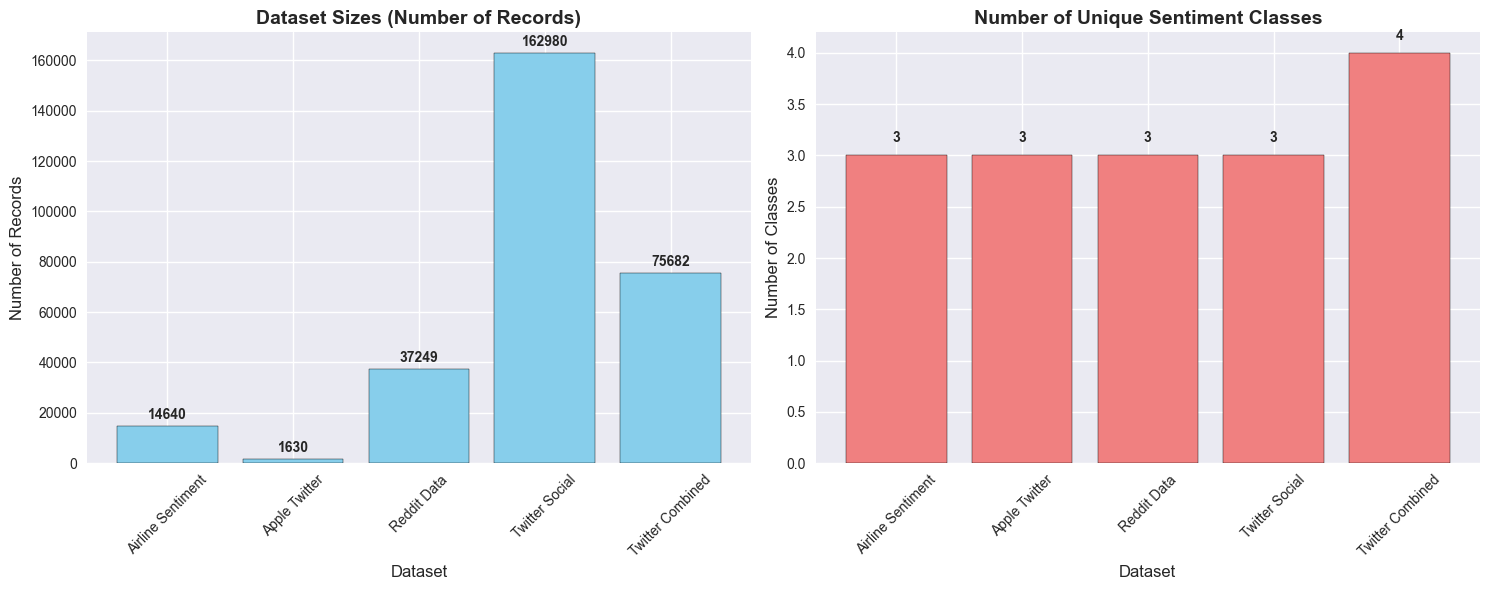


Total records across all datasets: 292,181
Average dataset size: 58436
Largest dataset: Twitter Social (162,980 records)
Smallest dataset: Apple Twitter (1,630 records)


In [61]:
datasets_info = {
    'Airline Sentiment': {
        'shape': airline_df.shape,
        'sentiment_col': 'airline_sentiment',
        'text_col': 'text',
        'unique_sentiments': airline_df['airline_sentiment'].nunique()
    },
    'Apple Twitter': {
        'shape': apple_df.shape,
        'sentiment_col': 'sentiment',
        'text_col': 'text',
        'unique_sentiments': apple_df['sentiment'].nunique()
    },
    'Reddit Data': {
        'shape': reddit_df.shape,
        'sentiment_col': 'category',
        'text_col': 'clean_comment',
        'unique_sentiments': reddit_df['category'].nunique()
    },
    'Twitter Social': {
        'shape': twitter_social_df.shape,
        'sentiment_col': 'category',
        'text_col': 'clean_text',
        'unique_sentiments': twitter_social_df['category'].nunique()
    },
    'Twitter Combined': {
        'shape': twitter_combined_df.shape,
        'sentiment_col': 'sentiment',
        'text_col': 'comment',
        'unique_sentiments': twitter_combined_df['sentiment'].nunique()
    }
}
comparison_df = pd.DataFrame({
    'Dataset': list(datasets_info.keys()),
    'Rows': [info['shape'][0] for info in datasets_info.values()],
    'Columns': [info['shape'][1] for info in datasets_info.values()],
    'Unique_Sentiments': [info['unique_sentiments'] for info in datasets_info.values()]
})
print("Dataset Comparison Summary:")
print(comparison_df.to_string(index=False))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.bar(comparison_df['Dataset'], comparison_df['Rows'], color='skyblue', edgecolor='black')
ax1.set_title('Dataset Sizes (Number of Records)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Dataset', fontsize=12)
ax1.set_ylabel('Number of Records', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Rows']):
    ax1.text(i, v + max(comparison_df['Rows'])*0.01, str(v), ha='center', va='bottom', fontweight='bold')
ax2.bar(comparison_df['Dataset'], comparison_df['Unique_Sentiments'], color='lightcoral', edgecolor='black')
ax2.set_title('Number of Unique Sentiment Classes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dataset', fontsize=12)
ax2.set_ylabel('Number of Classes', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Unique_Sentiments']):
    ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()
print(f"\nTotal records across all datasets: {comparison_df['Rows'].sum():,}")
print(f"Average dataset size: {comparison_df['Rows'].mean():.0f}")
print(f"Largest dataset: {comparison_df.loc[comparison_df['Rows'].idxmax(), 'Dataset']} ({comparison_df['Rows'].max():,} records)")
print(f"Smallest dataset: {comparison_df.loc[comparison_df['Rows'].idxmin(), 'Dataset']} ({comparison_df['Rows'].min():,} records)")